In [1]:
#How much revenue was lost? (predict what it likely would have been and then compare to what it actually was?)

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
from mpl_toolkits.axisartist.axislines import SubplotZero

In [3]:
data2019 = pd.read_csv("Resources/RevenuePassengerMiles2019.csv")
data2020 = pd.read_csv("Resources/RevenuePassengerMiles2020.csv")
domestic_revenue= pd.read_csv("Resources/Domestic Revenue.csv")

In [4]:
combined_revenue = pd.merge(data2019, data2020, on= ["Month"], how = "outer")

In [5]:
# show all revenue data by months
combined_revenue.head()

,Year_x,Month,DOMESTIC_x,INTERNATIONAL_x,TOTAL_x,Year_y,DOMESTIC_y,INTERNATIONAL_y,TOTAL_y
0,2019.0,Jan,"54,357,953","22,507,073","76,865,026",2020.0,57630787.0,23373467.0,81004254.0
1,2019.0,Feb,"51,406,118","19,291,164","70,697,283",2020.0,55336176.0,18526225.0,73862401.0
2,2019.0,Mar,"65,407,750","24,488,323","89,896,073",2020.0,32526582.0,10221782.0,42748364.0
3,2019.0,Apr,"61,953,253","24,174,894","86,128,147",2020.0,2550811.0,342509.0,2893320.0
4,2019.0,May,"65,811,129","26,667,148","92,478,276",2020.0,6987716.0,468622.0,7456338.0


In [6]:
combined_revenue = combined_revenue.rename(columns={"DOMESTIC_x": "Domestic 2019", "INTERNATIONAL_x": "International 2019", "TOTAL_x": "Total 2019", "DOMESTIC_y": "Domestic 2020", "INTERNATIONAL_y": "International 2020", "TOTAL_y": "Total 2020"})

In [7]:
combined_revenue

,Year_x,Month,Domestic 2019,International 2019,Total 2019,Year_y,Domestic 2020,International 2020,Total 2020
0,2019.0,Jan,"54,357,953","22,507,073","76,865,026",2020.0,57630787.0,23373467.0,81004254.0
1,2019.0,Feb,"51,406,118","19,291,164","70,697,283",2020.0,55336176.0,18526225.0,73862401.0
2,2019.0,Mar,"65,407,750","24,488,323","89,896,073",2020.0,32526582.0,10221782.0,42748364.0
3,2019.0,Apr,"61,953,253","24,174,894","86,128,147",2020.0,2550811.0,342509.0,2893320.0
4,2019.0,May,"65,811,129","26,667,148","92,478,276",2020.0,6987716.0,468622.0,7456338.0
...,...,...,...,...,...,...,...,...,...
219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# drop unnecessary columns
combined_revenue = combined_revenue.drop(columns=["Year_x", "Year_y"])


In [9]:
# drop null values
combined_revenue = combined_revenue.dropna()
combined_revenue

,Month,Domestic 2019,International 2019,Total 2019,Domestic 2020,International 2020,Total 2020
0,Jan,"54,357,953","22,507,073","76,865,026",57630787.0,23373467.0,81004254.0
1,Feb,"51,406,118","19,291,164","70,697,283",55336176.0,18526225.0,73862401.0
2,Mar,"65,407,750","24,488,323","89,896,073",32526582.0,10221782.0,42748364.0
3,Apr,"61,953,253","24,174,894","86,128,147",2550811.0,342509.0,2893320.0
4,May,"65,811,129","26,667,148","92,478,276",6987716.0,468622.0,7456338.0
5,Jun,"68,413,114","29,322,269","97,735,383",14007580.0,884139.0,14891719.0
6,Jul,"71,276,327","30,447,264","101,723,592",20061944.0,1963035.0,22024980.0
7,Aug,"68,147,755","29,802,655","97,950,411",20942793.0,2597972.0,23540765.0
8,Sep,"58,213,654","25,083,576","83,297,229",20474546.0,2559885.0,23034431.0
9,Oct,"63,323,789","24,290,255","87,614,044",24425632.0,3401659.0,27827292.0


In [10]:
# collect total revenue for domestic and international travel combined
revenue_totals = combined_revenue[["Month", "Total 2019", "Total 2020"]]
revenue_totals

,Month,Total 2019,Total 2020
0,Jan,"76,865,026",81004254.0
1,Feb,"70,697,283",73862401.0
2,Mar,"89,896,073",42748364.0
3,Apr,"86,128,147",2893320.0
4,May,"92,478,276",7456338.0
5,Jun,"97,735,383",14891719.0
6,Jul,"101,723,592",22024980.0
7,Aug,"97,950,411",23540765.0
8,Sep,"83,297,229",23034431.0
9,Oct,"87,614,044",27827292.0


In [11]:
revenue_totals["Total 2020"] = revenue_totals["Total 2020"].astype(int)
revenue_totals

<ipython-input-11-a1cf039864d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_totals["Total 2020"] = revenue_totals["Total 2020"].astype(int)


,Month,Total 2019,Total 2020
0,Jan,"76,865,026",81004254
1,Feb,"70,697,283",73862401
2,Mar,"89,896,073",42748364
3,Apr,"86,128,147",2893320
4,May,"92,478,276",7456338
5,Jun,"97,735,383",14891719
6,Jul,"101,723,592",22024980
7,Aug,"97,950,411",23540765
8,Sep,"83,297,229",23034431
9,Oct,"87,614,044",27827292


In [12]:
revenue_totals['Total 2019'] = revenue_totals['Total 2019'].str.replace(",","")
revenue_totals['Total 2019'] = revenue_totals["Total 2019"].astype(int)

<ipython-input-12-89710a673f79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_totals['Total 2019'] = revenue_totals['Total 2019'].str.replace(",","")
<ipython-input-12-89710a673f79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_totals['Total 2019'] = revenue_totals["Total 2019"].astype(int)


In [13]:
revenue_totals["Difference"] = revenue_totals["Total 2020"] - revenue_totals["Total 2019"]


<ipython-input-13-b46eebc7c82c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_totals["Difference"] = revenue_totals["Total 2020"] - revenue_totals["Total 2019"]


In [38]:
# revenue_totals.columns
# x_axis = revenue_totals["Month"]
y_axis = revenue_totals["Total 2019"]
x_axis_2020 = revenue_totals["Month"]
y_axis_2020 = revenue_totals["Total 2020"]

# plt.plot (x_axis, y_axis)

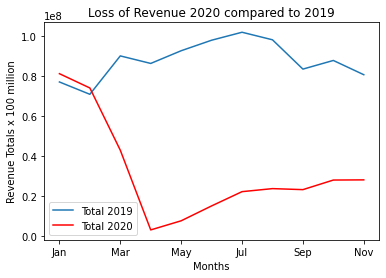

In [45]:
# plot the 2019 and 2020 revenue over the course of 11 months of data
ax= plt.gca()
revenue_totals.plot(kind='line', x='Month', y='Total 2019', ax=ax)
revenue_totals.plot(kind='line', x='Month', y='Total 2020', color='red', ax=ax)
plt.title("Loss of Revenue 2020 compared to 2019")
plt.xlabel("Months")
plt.ylabel("Revenue Totals x 100 million")
plt.show()

Text(0, 0.5, 'Revenue x 100 million')

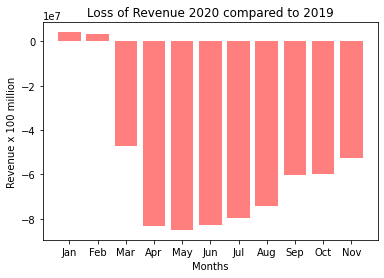

In [44]:
# using a bar chart, show the difference in revenue between the two years
users = revenue_totals["Difference"]
x_axis = x_axis_2020
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

plt.title("Gain/Loss of Revenue 2020 Compared to 2019")
plt.xlabel("Months")
plt.ylabel("Revenue x 100 million")

In [17]:
domestic_revenue = domestic_revenue[["2017", "2018", "2019", "2020"]]
domestic_revenue.dropna()
# 0-9 Are months January - October, 10 is the 10 month total, 11 is the yearly total - includes November and December data, 
# which is not available for 2020.


,2017,2018,2019,2020
0,50.1,51.7,54.4,57.6
1,46.5,49.5,51.4,55.3
2,58.8,61.7,65.4,32.5
3,56.3,59.3,62.0,2.6
4,59.0,62.6,65.8,7.0
5,62.5,66.1,68.4,14.0
6,65.0,69.1,71.3,20.1
7,62.5,66.1,68.2,21.0
8,51.9,55.4,58.2,20.5
9,58.3,61.0,63.3,24.4


In [18]:
ten_month_revenue = domestic_revenue.iloc[10:11]

ten_month_revenue

,2017,2018,2019,2020
10,570.9,602.6,628.3,255.0


In [19]:
# compare total revenue data from 2017-2020 by percent of increase/decrease from previous year. 

ten_month_revenue = ten_month_revenue.pct_change(axis='columns')

ten_month_revenue

,2017,2018,2019,2020
10,NaN,0.055526,0.042649,-0.594143


In [22]:
percent_data = {"Year": [2018, 2019, 2020], "Percent Change": [.055, .043, -.5942]}
pd.options.display.float_format = '{:.2%}'.format
revenue_percent = pd.DataFrame(data= percent_data)
revenue_percent


,Year,Percent Change
0,2018,5.50%
1,2019,4.30%
2,2020,-59.42%
